# Figures of chapter 2

saved to: /Users/lu/Desktop/HK_variational.pdf


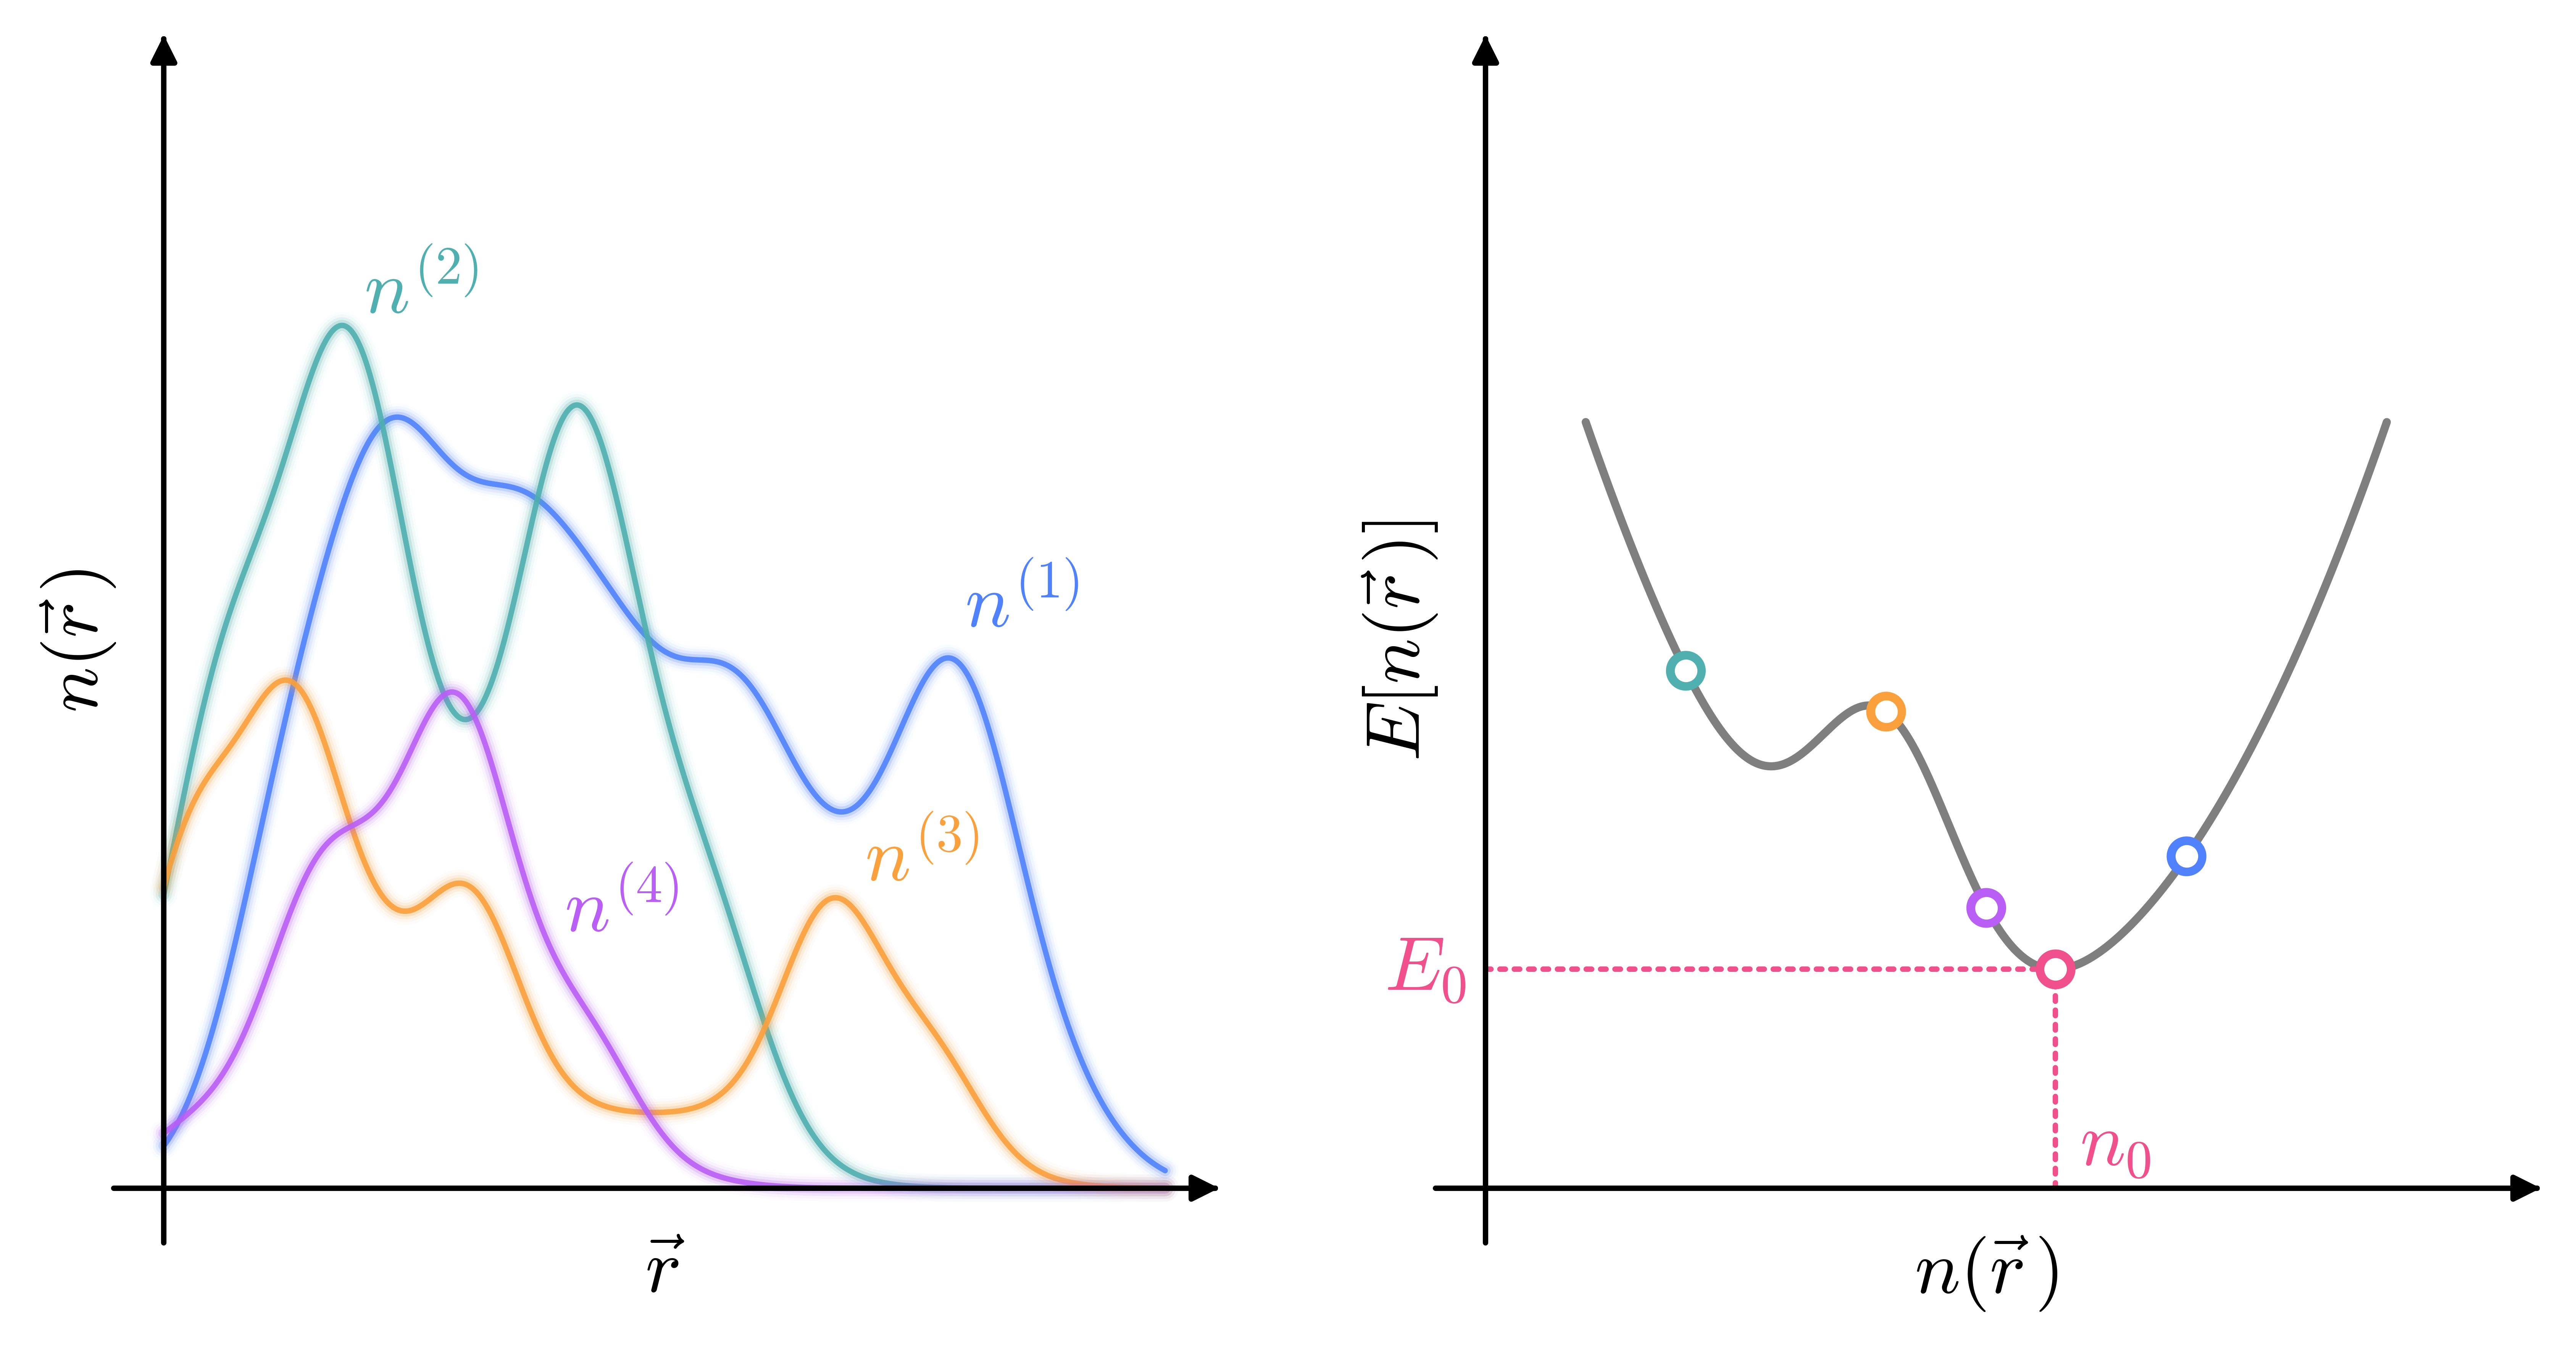

In [25]:
# 2.3.3 The Hohenberg–Kohn theorem

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from mpl_toolkits.axisartist.axislines import AxesZero

## personal settings
label = 14
params = {"text.usetex": False,
          "font.family": "serif",
          "mathtext.fontset": "cm",
          "axes.titlesize": 16,
          "axes.labelsize": label,
          "figure.facecolor": "w"}
plt.rcParams.update(params)
fig = plt.figure(figsize=(8.0, 4.0), dpi=1024)
# fig.suptitle("Hohenberg-Kohn variational picture", fontsize=16)

## two AxesZero
axes = [fig.add_subplot(1, 2, i, axes_class=AxesZero) for i in (1, 2)]
for ax in axes:
    for d in ("xzero", "yzero"):
        ax.axis[d].set_axisline_style("-|>")
        ax.axis[d].set_visible(True)
    for d in ("left", "right", "bottom", "top"):
        ax.axis[d].set_visible(False)
    ax.set(xlim=(-0.05, 1.05), ylim=(-0.05, 1.05), xticks=[], yticks=[])

## axes labels (use axisartist labels, not plt.xlabel/plt.ylabel)
axes[0].axis["xzero"].label.set_text(r"$\vec{r}$")
axes[0].axis["yzero"].label.set_text(r"$n(\vec{r}\,)$")
axes[1].axis["xzero"].label.set_text(r"$n(\vec{r}\,)$")
axes[1].axis["yzero"].label.set_text(r"$E[n(\vec{r}\,)]$")

colors = ["#5082FF", "#50AFAF", "#FAA03C", "#B95FF5"]

## Cures
r = np.linspace(0.0, 1.0, 600)
blur = ((5, .025), (4, .05), (3, .1), (2, .2))  # (lw, alpha)
# left: n=n(r)
curves = [([.2,.4,.6,.8], [8, 9, 7, 9], 1,.1, 4,.8),
          ([.1,.2,.4,.5], [4, 5, 6, 4], 1,.1, 5,.2),
          ([.1,.3,.5,.7], [5, 4, 1, 9], 2,.1, 6,.7),
          ([.1,.2,.3,.4], [1, 4, 9, 5], 3,.1, 6,.4)]

for i,(cs,As,k,a,f,x0) in enumerate(curves, 1):
    n = sum(A*np.exp(-0.5*((r-c)/.08)**2) for c,A in zip(cs,As))
    n = (n/n.max())*(1 + a*np.sin(2*np.pi*f*r + 0.7*i)) * np.exp(-k*r)
    c = colors[i-1]
    for lw, a in blur:
        axes[0].plot(r, n, lw=lw, alpha=a, color=c, solid_capstyle="round")
    axes[0].plot(r, n, lw=1, alpha=0.9, color=c, solid_capstyle="round")
    y0 = np.interp(x0, r, n)
    axes[0].text(x0, y0+0.04, rf"$n^{{({i})}}$", fontsize=label, alpha=1.0,color=c)
# right: E = E[n]
n = np.linspace(0.1, 0.9, 900)
E = (10*(n-0.5))**2 + 7*np.exp(-((n-0.4)/0.1)**2)
E = 0.2+0.50*(E-E.min())/(E.max()-E.min())
axes[1].plot(n,E,"k", lw=1.5, alpha=0.5, solid_capstyle="round", zorder=1)
n_pts = [0.7, 0.2, 0.4, 0.5]
axes[1].scatter(n_pts, np.interp(n_pts, n, E), s=40, c=colors, zorder=4)
axes[1].scatter(n_pts, np.interp(n_pts, n, E), s=10, c="w", zorder=5)
# mark the minimum point
i0 = np.argmin(E)
n0, E0 = n[i0], E[i0]
axes[1].scatter([n0], [E0], s=40, c="#F0508C", zorder=6)
axes[1].scatter([n0], [E0], s=10, c="w", zorder=7)
axes[1].plot([n0, n0], [0,  E0], ls=":", lw=1, color="#F0508C", alpha=1, dash_capstyle="round", zorder=2)
axes[1].plot([0,  n0], [E0, E0], ls=":", lw=1, color="#F0508C", alpha=1, dash_capstyle="round", zorder=2)
axes[1].text(-0.06, E0, r"$E_0$", fontsize=label, ha="center", va="center", color="#F0508C")
axes[1].text(n0+0.06, 0.04, r"$n_0$", fontsize=label, ha="center", va="center", color="#F0508C")

## Output
out = Path.home() / "Desktop" / "HK_variational.pdf"
plt.savefig(out, bbox_inches="tight")
print("saved to:", out)
